<h1 align = 'center'> <font color = 'yellow'>Feature Engineering</font></h1>

<h1 align = "center"> <font color = 'green'> Task 1: Feature Selection </font></h1>



#### What is Feature Selection ? 

Feature selection is the process of selecting the most relevant features (variables) from a dataset for use in machine learning models. It helps improve the accuracy and efficiency of the models by reducing the redundancy and noise in the dataset.It is usually used as a pre-processing step before doing the actual learning.

---
<h4 align = 'center' ><font color = lime> Types Of Features Selection Methods</font></h4>   

---

---

<h3 align = 'center'><font color = "#1589FF">Supervised Feature Selection </font></h3>

---
#### What are Supervised Features Selection ?

Supervised feature selection methods involve training a model with labeled data to predict the target variable. The selected features are then considered relevant based on their importance or relevance to the model's performance.

#### Methods:

- Filter Methods:  These methods evaluate the relevance of features based on their intrinsic statistical properties(like mean , variance , Correlation, Distribution ,etc). Features that show strong statistical relationships with the target variable are considered relevant. Some of the common algorithms used in filter methods are:

  - Pearson Correlation Coefficient (Pearson's r)
  - Chi Squared
  - ANOVA Coefficient

- Wrapper Methods: These methods evaluate a subset of features and select the best subset based on a given criterion (e.g., accuracy, F1 score). Some examples are given below:

  - Recursive Feature Elimination (RFE)
  - Genetic Algorithms

- Embedded Methods: These methods learn the feature importance during the model training process.Some of the algorithms are given below:

  - Lasso Regularization
  - Decision Tree

---

<h3 align = center><font color = 'AAF0D1'>Unsupervised Features Selection </font></h3>

---

#### What are Unsupervised Features Selection ?

Unsupervised feature selection methods involve uncovering patterns and relationships within the dataset without the target variable. These methods are useful for dimensionality reduction, anomaly detection, and clustering.

--- 



Based on the input and target variables , we can choose our feature selection methods.

For example:

* Input (Numerical) -> Output (Numerical)

we can use pearson's correlation coefficient method.

* Input (Categorical) -> Output (Categorical)

we can use chi-square method.

* Input (Numerical) -> Output (Categorical)

we can use ANOVA method.

---



<h2 align = center><font color = '00A36C'> Importing Necessary Libraries 📚 </h2></font>

---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


---
<h2 align = center> Importing Built-in Dataset from Seaborn 📄</h2>

---

In [3]:
data = sns.load_dataset('diamonds')

---
<h2 align = center> <font color = "#728C00"> Data Exploration 🔍 </font></h2>   

---

### Data Columns

In [4]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Dataset Features Datatypes

In [5]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

### Data Head

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Checking Null Values

In [7]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Checking Catagorical Features

In [8]:
print(data['color'].unique())

print(data['cut'].unique())

print(data['clarity'].unique())


['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


### Converting Categorical Features To Numerical Features

In [9]:
data['color'] = data['color'].astype('category').cat.codes
data['cut'] = data['cut'].astype('category').cat.codes
data['clarity'] = data['clarity'].astype('category').cat.codes

### Printing First 5 Rows Of Data

In [10]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75


#### Note: 
All the features are in numerical form so now we find correlation between them

---
<h2 align = center><font color = '#EB5406'> Using Calculating Correlation 🧮 </font></h2>   

---

In [11]:
corMat=data.corr()

### Plotting Correlation Matrix

<Axes: >

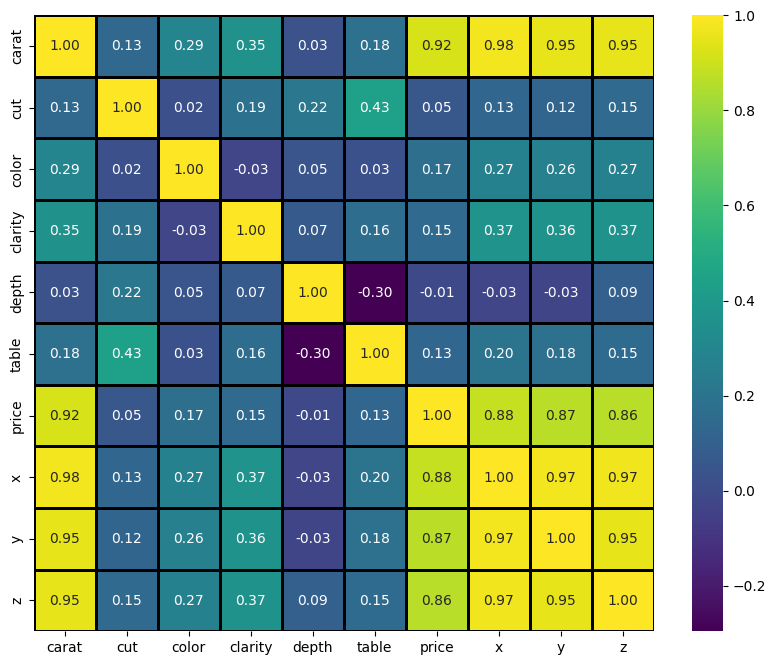

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corMat,cmap='viridis',linewidths=1,linecolor='black',annot=True , fmt= ".2f")

### Now if i take 'price' as my target or output variabel.

In [13]:
print(corMat['price'].sort_values(ascending=False))



price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
clarity    0.146800
table      0.127134
cut        0.053491
depth     -0.010647
Name: price, dtype: float64


---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---

The correlation matrix shows the correlation between the features. It helps us understand the relationships between different variables. In this case, the features 'carat',  'x', 'y', and 'z' have high positive correlation with 'price'. This means that as these features increase, 'price' also increases.

All the other features doesn't have much correlation with the feature 'price'. 

---
<h2 align = center><font color = F67280> Now Using Chi-Squared Method (Filter Method) 📏 </font>

---

In [14]:
from sklearn.feature_selection import SelectKBest , chi2

inputFeatures = data.drop('price',axis =1)
targetFeatures = data['price']

selector = SelectKBest(chi2 , k = 4)

selector.fit(inputFeatures , targetFeatures)

selectedFeatures = selector.get_support()

inputFeatures.columns[selectedFeatures]

Index(['carat', 'cut', 'color', 'clarity'], dtype='object')

---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---
Chi-Squared giving different features than the correlation matrix , because they both calculate the different things.The correlation matrix measures the linear relationship between pairs of features, providing a coefficient ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).


Where ,the chi-squared test is a statistical test used to determine if there is a significant association between categorical features and a target variable. When applied to feature selection, it measures the dependency between each feature and the target variable, assuming both are categorical

Since out target variable is numeric and continuous, the features which the correlation matrix give us is more relevant to us.



---
<h2 align = center> <font color = '#FD1C03'> Now Using Mutual Information Method (Filter Method) 📏</font>
   
---

In [15]:
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression , k = 4)
selector.fit(inputFeatures , targetFeatures)
selectedFeatures = selector.get_support()
inputFeatures.columns[selectedFeatures]


Index(['carat', 'x', 'y', 'z'], dtype='object')

---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---

Mutual information is a non-parametric statistical test that measures the dependency between two random variables. It calculates the mutual information between each feature and the target variable, providing a value between 0 and 1.

When applied to feature selection, it measures the mutual information between each feature and the target variable, considering the relationship between the variables. In this case, the Mutual Information method gives us more relevant features compared to the correlation matrix and chi-squared method.

So, based on the correlation, chi-squared, and mutual information methods, the relevant features for predicting the price of diamonds are 'carat', 'x', 'y', 'z',color and 'clarity'. These features have high correlation with 'price' and are also relevant based on the other methods used.

### Dropped features

1. The 'x', 'y', and 'z' features are dropped because 'carat' is a more comprehensive measure of the diamond's size, and it has a stronger relationship with 'price'.

2. 'table'
 
3. 'depth' 

---
<h3 align = center><font color = 1AA260> Selected Features ✅ </font></h3>

---

1. 'carat', This features shows the weight of diamond , which is a strong factor which increases the price of diamond.


2. 'color', This features represents the color of diamond. It is an ordinal feature and it has a relationship with 'price'. Higher the color, higher the price.

3. 'clarity', This features represents the clarity of diamond. It is an ordinal feature and it has a relationship with 'price'. Higher the clarity, higher the price.

These features are highly relevant to predict the price of diamonds. They have a strong correlation with 'price' and a relationship with each other and with 'color' and 'clarity'. The correlation matrix, chi-squared, and mutual information methods have provided the same relevant features.



---
<h3 align = center> <font color = #DAEE01> Model Training 🏋️ </font></h3>

---

Now that we have selected the relevant features, we can train a machine learning model to predict the price of diamonds.

Let's use a simple linear regression model for this purpose.

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = data[['carat','color', 'clarity']]

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

print(f"The Model Score is {model.score(X_test, y_test)}")



The Model Score is 0.9014959079109778


---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---


The 𝑅^2 score of 0.901 indicates that the linear regression model explains 90.1% of the variance in the target variable.

---
<h2 align = center><font color ="#9AFEFF" > Task 2: Feature Transformation 💱 </font></h3>

---

___
<h2 align = center><font color = "#006A4E" > Applying Normalization Using Min-Max Scaling ⚖️ </font></h2>

___

### Formula

$ X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$ 




In [26]:
def minMaxScaling(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

dataScaled = data.apply(minMaxScaling)


### Checking The Scaled Data



In [27]:
inputFeaturesScaled = dataScaled.drop('price',axis =1 )
targetFeaturesScaled = dataScaled['price']

print("First Five Rows OF Input Features\n")
print(inputFeaturesScaled.head())
print("\nFirst Five Rows OF Target Feature\n")

print(targetFeaturesScaled.head())


First Five Rows OF Input Features

      carat   cut     color   clarity     depth     table         x         y  \
0  0.006237  0.00  0.166667  0.857143  0.513889  0.230769  0.367784  0.067572   
1  0.002079  0.25  0.166667  0.714286  0.466667  0.346154  0.362197  0.065195   
2  0.006237  0.75  0.166667  0.428571  0.386111  0.423077  0.377095  0.069100   
3  0.018711  0.25  0.833333  0.571429  0.538889  0.288462  0.391061  0.071817   
4  0.022869  0.75  1.000000  0.857143  0.563889  0.288462  0.404097  0.073854   

          z  
0  0.076415  
1  0.072642  
2  0.072642  
3  0.082704  
4  0.086478  

First Five Rows OF Target Feature

0    0.000000
1    0.000000
2    0.000054
3    0.000433
4    0.000487
Name: price, dtype: float64


---
<h3 align = center> <font color = #DAEE01> Model Evaluation 📃  </font></h3>

---

I am evaluating the model on the basis of same selected input features as above evaluated model

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = inputFeaturesScaled

y = targetFeaturesScaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

print(f"The Model Score is {model.score(X_test, y_test)}")



The Model Score is 0.9056643685073514


---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---

Normalization using min-max saling does change the score little bit. Like from 0.901 to 0.905

---
<h2 align = center><font color = "#F778A1">Applying Standardization Using Z-Score Normalization 📉</h2></font>   

---

### Formula

$ X_{\text{scaled}} = \frac{X - \mu}{\sigma}$ 



In [29]:
def zScoreNormalization(x):
    return (x - np.mean(x)) / np.std(x)

dataNormalized = data.apply(zScoreNormalization)

### Checking the Normalized Data

In [30]:


inputFeaturesNormalized = dataNormalized.drop('price',axis =1 )
targetFeaturesNormalized = dataNormalized['price']

print("First Five Rows OF Input Features\n")
print(inputFeaturesNormalized.head())

print("\nFirst Five Rows OF Target Feature\n")
print(targetFeaturesNormalized.head())




First Five Rows OF Input Features

      carat       cut     color   clarity     depth     table         x  \
0 -1.198168 -0.981473 -0.937163  1.245215 -0.174092 -1.099672 -1.587837   
1 -1.240361 -0.085889 -0.937163  0.638095 -1.360738  1.585529 -1.641325   
2 -1.198168  1.705279 -0.937163 -0.576145 -3.385019  3.375663 -1.498691   
3 -1.071587 -0.085889  1.414272  0.030975  0.454133  0.242928 -1.364971   
4 -1.029394  1.705279  2.002131  1.245215  1.082358  0.242928 -1.240167   

          y         z  
0 -1.536196 -1.571129  
1 -1.658774 -1.741175  
2 -1.457395 -1.741175  
3 -1.317305 -1.287720  
4 -1.212238 -1.117674  

First Five Rows OF Target Feature

0   -0.904095
1   -0.904095
2   -0.903844
3   -0.902090
4   -0.901839
Name: price, dtype: float64


---
<h3 align = center> <font color = #DAEE01> Model Evaluation 📃  </font></h3>

---

I am evaluating the model on the basis of same selected input features as above evaluated model

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = inputFeaturesNormalized

y = targetFeaturesNormalized

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

print(f"The Model Score is {model.score(X_test, y_test)}")




The Model Score is 0.9056643685073519


---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---

Standardization using Z-score normalization does change the score slightly. Like from 0.901 to 0.905 as well.

---
<h2 align = center><font color = "#F535AA"> Applying Log Transformation 🧮   
</font></h2>   

---


### Formula 

$ X_{\text{scaled}} = \log(X)$ 




In [35]:
def logTransformation(x):
    return np.log(x + 1e-10) # i add little value for each x so that we don't have error when log(0)

dataTransformed = data.apply(logTransformation)

### Checking the transformed Data

In [33]:


inputFeaturesTransformed = dataTransformed.drop('price',axis =1 )
targetFeaturesTransformed = dataTransformed['price']

print("First Five Rows OF Input Features\n")
print(inputFeaturesTransformed.head())

print("\nFirst Five Rows OF Target Feature\n")
print(targetFeaturesTransformed.head())


First Five Rows OF Input Features

      carat           cut         color   clarity     depth     table  \
0 -1.469676 -2.302585e+01  1.000000e-10  1.791759  4.119037  4.007333   
1 -1.560648  1.000000e-10  1.000000e-10  1.609438  4.091006  4.110874   
2 -1.469676  1.098612e+00  1.000000e-10  1.098612  4.041295  4.174387   
3 -1.237874  1.000000e-10  1.609438e+00  1.386294  4.133565  4.060443   
4 -1.171183  1.098612e+00  1.791759e+00  1.791759  4.147885  4.060443   

          x         y         z  
0  1.373716  1.381282  0.887891  
1  1.358409  1.345472  0.837248  
2  1.398717  1.403643  0.837248  
3  1.435085  1.442202  0.966984  
4  1.467874  1.470176  1.011601  

First Five Rows OF Target Feature

0    5.786897
1    5.786897
2    5.789960
3    5.811141
4    5.814131
Name: price, dtype: float64


---
<h3 align = center> <font color = #DAEE01> Model Evaluation 📃  </font></h3>

---

I am evaluating the model on the basis of same selected input features as above evaluated model

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = inputFeaturesTransformed

y = targetFeaturesTransformed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


model = LinearRegression()

model.fit(X_train, y_train)

print(f"The Model Score is {model.score(X_test, y_test)}")



The Model Score is 0.9436287040329945


---
<h3 align = center> <font color = '#4863A0' > Interpretation 🔎 </font> </h3>

---

Log transformation changes the model performance very much. from 0.901 to 0.94.

--- 
<h2 align = center> <font color = "#08A04B"> Result ✔️

</font></h2>

---

So i've applied Min-Max Scaling , Z-score normalization and Log transformation. 

- Min-Max Scaling gave  the slightly better model performance with a score of 0.905(previous was 0.901).

- Z-score normalization also gave the same model performance as Min-Max Scaling.

- Log transformation gave the best model performance with a score of 0.94(previous was 0.905).

---
<h2 align = center> <font color = '#5865F2'>Task 3: Feature Creation 🏗️</font> </h2>

---


I am using the same diamond dataset for this Task. As we already can see there are x , y and z values that tells the length , width and height of the diamond . So i am combining these 3 values to find volume of the diamond.And also i am multiplying carat and depth of diamond columns to make another feature called "carat&depth" 


In [200]:
data['volume'] = data['x']*data['y']*data['z']
data['carat&depth'] = data['carat']*data['depth'] 
data['color&clarity'] = data['color']*data['clarity']

print(data['volume'].head())
print(data['carat&depth'].head())
print(data['color&clarity'].head())

0    38.202030
1    34.505856
2    38.076885
3    46.724580
4    51.917250
Name: volume, dtype: float64
0    14.145
1    12.558
2    13.087
3    18.096
4    19.623
Name: carat&depth, dtype: float64
0     6
1     5
2     3
3    20
4    36
Name: color&clarity, dtype: int8


Now i am evaluating the model with old features and new features

<h3 align = center><font color = '#822EFF' >Using Old Features</h3></font>

In [193]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = data[['carat','color', 'clarity']]
y = targetFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"The Model Score is {model.score(X_test, y_test)}")





The Model Score is 0.9014959079109778


<h3 align = center><font color = "E45E9D">Using New Features</h3></font>

I am replacing 'carat' feature with 'volume' ,'color' feature with 'color&clarity',and adding 'carat&depth' feature

In [201]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

new_features = data[['volume','cut&clarity','carat&depth']]

new_featuresScaling = new_features.apply(minMaxScaling)
new_featuresNormalization = new_features.apply(zScoreNormalization)
new_featuresTransformed = new_features.apply(logTransformation)

X = new_features
# xScaled = new_featuresScaling[['volume','color&clarity','carat&depth',]]
# xNormalized = new_featuresNormalization[['volume','color&clarity','carat&depth',]]
# xTransformed = new_featuresTransformed[['volume','color&clarity','carat&depth',]]

y = targetFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
print(f"The New Features Model Score is {model.score(X_test, y_test)}")


# y = targetFeaturesScaled

# X_train, X_test, y_train, y_test = train_test_split(xScaled, y, test_size=0.2,random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)

# print(f"The Scaled Model Score is {model.score(X_test, y_test)}")



# y = targetFeaturesTransformed

# X_train, X_test, y_train, y_test = train_test_split(xTransformed, y, test_size=0.2,random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)

# print(f"The Transformed Model Score is {model.score(X_test, y_test)}")



# y = targetFeaturesNormalized

# X_train, X_test, y_train, y_test = train_test_split(xNormalized, y, test_size=0.2,random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)

# print(f"The Normalized Model Score is {model.score(X_test, y_test)}")



The New Features Model Score is 0.8779905923782279


--- 
<h2 align = center> <font color = "#08A04B"> Result ✔️

</font></h2>

---

After creating new features from existing ones, the model performed worse with the new features. The scores are as follows:

- Original Model Score: 0.905 

- New Features Model Score : 0.877

---
<h2 align = center> <font color = '#FFA600'>Task 4: Polynomial Features 🏗️</font> </h2>

---

---
<h3 align = center> <font color = #DAEE01>Orignal Selected Features Model Training 🏋️ </font></h3>

---

The Original Model Score is 0.9014959079109778


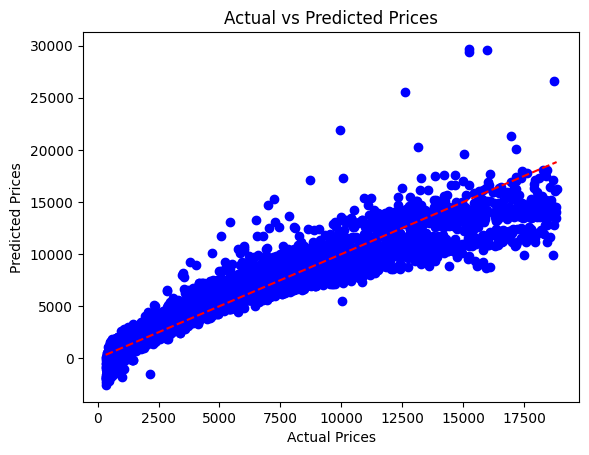

Training Score: 0.9025557287246223
Test Score: 0.9014959079109778


In [267]:
import matplotlib.pyplot as plt

X = data[['carat','color', 'clarity']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"The Original Model Score is {model.score(X_test, y_test)}")

predictions = model.predict(X_test)

plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()



### Interpretation

The original linear regression model has a score of approximately 0.905 on the test set. This means that the model can explain about 90.5% of the variability in the target variable (price) using the given features (carat, color, clarity).

The plot shows a scatter plot of actual prices and predicted prices. The red line represents a line, which would indicate perfect prediction. In this case, the model is slightly underfitting the data, as the points are not perfectly on the line.

To improve the model's performance, we can try adding polynomial features to the dataset. Polynomial features will create new features that are powers of existing features, which can help capture non-linear relationships between the features and the target variable.

Let's implement polynomial features and train a new model.

---
<h3 align = center> <font color = #DAEE01> Polynomial Selected Features Model Training 🏋️ </font></h3>

---

The Polynomial Model Score is 0.9737283595221654


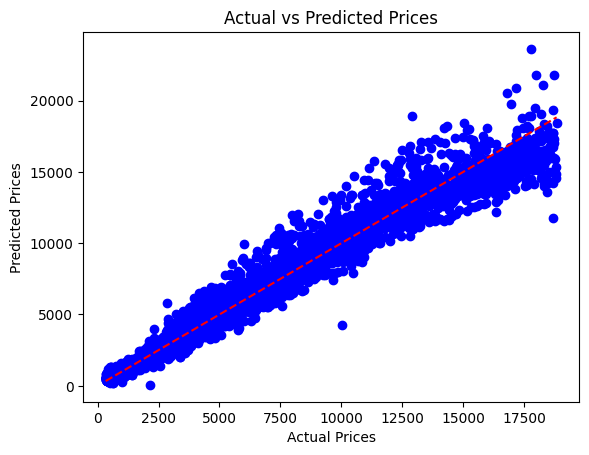

In [268]:
from sklearn.preprocessing import PolynomialFeatures
X = data[['carat','color', 'clarity']]
y = data['price']

poly = PolynomialFeatures(degree=4)

x_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train,y_train)

print(f"The Polynomial Model Score is {model.score(X_test, y_test)}")



predictions = model.predict(X_test)


plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()



### Interpretation

The polynomial regression model with degree 4 has a score of approximately 0.974 on the test set. This means that the model can explain about 97.4% of the variability in the target variable (price) using the given features (carat, color, clarity) after adding polynomial features.

The plot shows a scatter plot of actual prices and predicted prices. The red line represents a line, which would indicate perfect prediction. In this case, the model is slightly overfitting the data, as the points are not perfectly on the line.

To further improve the model's performance, we can try adjusting the degree of the polynomial features or experimenting with other regression algorithms, such as Ridge Regression or Lasso Regression.



--- 
<h2 align = center> <font color = "#08A04B"> Result ✔️

</font></h2>

---



1. The original selected features linear regression model has a score of approximately 0.901 on the test set.

2. The polynomial selected features linear regression model with degree 4 has a score of approximately 0.974 on the test set.



 The Polynomial Features model provides better performance compared to the original feature model.


---
<h2 align = center> <font color = '#FFA600'>Task 5: Handling Categorical Features 🗒️ </font> </h2>

---

In [269]:
# making new copy of data.

data = sns.load_dataset('diamonds')


<h3> Exploring Categorical Data </h3>

In [270]:
# First Finding the Categorical Data

data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

---
<h2 align = center><font color = "#E55B3C"> Using Label Encoding 🏷️</font><h2>   

---

### Converting Categorical Data One By One

#### Converting "cut" features

In [273]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['cut'] = encoder.fit_transform(data['cut'])

print(data['cut'].unique())


[2 3 1 4 0]
[2 3 1 4 0]


#### Converting "color" feature

In [275]:
data['color'] = encoder.fit_transform(data['color'])
print(data['color'].unique())


[1 5 6 4 2 3 0]


#### Converting "clarity" feature

In [276]:

data['clarity'] = encoder.fit_transform(data['clarity'])

print(data['clarity'].unique())

[3 2 4 5 7 6 0 1]


---
<h3 align = center> <font color = #DAEE01> Model Training 🏋️ </font></h3>

---

In [278]:
# I am not removing any features from the training data.

model = LinearRegression()

x =data.drop('price',axis=1)

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(f"The Model Score Using Label Encoding is {model.score(X_test, y_test)}")

The Model Score Using Label Encoding is 0.885139743367963


---
<h2 align = center><font color = "#FF007F"> Using One Hot Encoding 🔥</font><h2>   

---

In [288]:
# making new copy of data.

encoded = sns.load_dataset('diamonds')



#### Converting Features

In [289]:
encodedData = pd.get_dummies(encoded,columns=['cut','clarity','color'])
print(encodedData.columns)




Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'cut_Good', 'cut_Fair', 'clarity_IF',
       'clarity_VVS1', 'clarity_VVS2', 'clarity_VS1', 'clarity_VS2',
       'clarity_SI1', 'clarity_SI2', 'clarity_I1', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')


---
<h3 align = center> <font color = #DAEE01> Model Training 🏋️ </font></h3>

---

In [290]:
x = encodedData.drop('price',axis=1)
y = encodedData['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

print(f"The Model Score Using One Hot Encoding is {model.score(X_test, y_test)}")

The Model Score Using One Hot Encoding is 0.9189335470284822



--- 
<h2 align = center> <font color = "#08A04B"> Result ✔️

</font></h2>

---


1. The model's score using Label Encoding is approximately 0.885.
2. The model's score using One Hot Encoding is approximately 0.918.

The One Hot Encoding model provides better performance compared to the Label Encoding model.But the dimension of the data increases, which means we can tradeoff accuracy with the space
